# 📊 Mutual Fund NAV Prediction & Analysis

---

**Author:**  Roushan Kumar

**Dataset:** Mutual Fund Schemes (16,076 records, 16 columns)  
**Objective:** Predict NAV of schemes using Random Forest and extract key insights  
**Tools & Libraries:** Python, Pandas, NumPy, Matplotlib, Seaborn, scikit-learn  

---

### 🚀 Notebook Overview

1. **Data Loading & Cleaning**  
2. **Exploratory Data Analysis (EDA) & Visualizations**  
3. **Feature Engineering (Scheme Age, Encoding)**  
4. **Model Building (Linear Regression, Random Forest)**  
5. **Model Evaluation (RMSE, R², Feature Importance)**  
6. **Insights & Conclusion**

### **Data Loading**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mutual_fund_data.csv")

In [3]:
df.head(5)

,Scheme_Code,Scheme_Name,AMC,Scheme_Type,Scheme_Category,Scheme_NAV_Name,Scheme_Min_Amt,NAV,Latest_NAV_Date,Average_AUM_Cr,AAUM_Quarter,ISIN_Div_Payout/Growth,ISIN_Div_Reinvestment,ISIN_Div_Payout/Growth/Div_Reinvestment,Launch_Date,Closure_Date
0,100033,Aditya Birla Sun Life Large & Mid Cap Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Equity Scheme - Large & Mid Cap Fund,Aditya Birla Sun Life Large & Mid Cap Fund - R...,5000,917.0700,2025-09-19,4381.2909,April - June 2025,INF209K01165,-,INF209K01165,1995-02-24,1995-02-24
1,100034,Aditya Birla Sun Life Large & Mid Cap Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Equity Scheme - Large & Mid Cap Fund,Aditya Birla Sun Life Large & Mid Cap Fund -Re...,5000,142.2300,2025-09-19,488.1489,April - June 2025,INF209K01157,INF209K01CE5,INF209K01157INF209K01CE5,1995-02-24,1995-02-24
2,100037,Aditya Birla Sun Life Income Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Medium to Long Duration Fund,Aditya Birla Sun Life Income Fund - Regular - ...,5000,13.1477,2025-09-19,12.1434,April - June 2025,INF209K01587,INF209K01CY3,INF209K01587INF209K01CY3,1994-01-01,1994-01-01
3,100038,Aditya Birla Sun Life Income Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Medium to Long Duration Fund,Aditya Birla Sun Life Income Fund - Growth - R...,5000,125.5551,2025-09-19,875.5946,April - June 2025,INF209K01579,-,INF209K01579,1994-01-01,1994-01-01
4,100039,Aditya Birla Sun Life Income Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Medium to Long Duration Fund,Birla Income Plus-Institutional (Growth),5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-01-01,1994-01-01


In [4]:
df.tail(5)

,Scheme_Code,Scheme_Name,AMC,Scheme_Type,Scheme_Category,Scheme_NAV_Name,Scheme_Min_Amt,NAV,Latest_NAV_Date,Average_AUM_Cr,AAUM_Quarter,ISIN_Div_Payout/Growth,ISIN_Div_Reinvestment,ISIN_Div_Payout/Growth/Div_Reinvestment,Launch_Date,Closure_Date
16071,153900,Invesco India Consumption Fund,Invesco Asset Management (India) Private Limited,Open Ended,Equity Scheme - Sectoral/ Thematic,Invesco India Consumption Fund - Direct Plan -...,1000,NaN,NaN,NaN,NaN,NaN,NaN,INF205KA1BI6,2025-10-03,2025-10-17
16072,153901,Invesco India Consumption Fund,Invesco Asset Management (India) Private Limited,Open Ended,Equity Scheme - Sectoral/ Thematic,Invesco India Consumption Fund - Direct Plan -...,1000,NaN,NaN,NaN,NaN,NaN,NaN,INF205KA1BJ4INF205KA1BK2,2025-10-03,2025-10-17
16073,153902,Invesco India Consumption Fund,Invesco Asset Management (India) Private Limited,Open Ended,Equity Scheme - Sectoral/ Thematic,Invesco India Consumption Fund - Growth Plan,1000,NaN,NaN,NaN,NaN,NaN,NaN,INF205KA1BF2,2025-10-03,2025-10-17
16074,153903,Invesco India Consumption Fund,Invesco Asset Management (India) Private Limited,Open Ended,Equity Scheme - Sectoral/ Thematic,Invesco India Consumption Fund - IDCW Plan,1000,NaN,NaN,NaN,NaN,NaN,NaN,INF205KA1BG0INF205KA1BH8,2025-10-03,2025-10-17
16075,153904,Kotak Nifty 200 Momentum 30 ETF,Kotak Mahindra Asset Management Company Limited.,Open Ended,Other Scheme - Other ETFs,Kotak Nifty 200 Momentum 30 ETF,5000,NaN,NaN,NaN,NaN,NaN,NaN,INF174KA1XS6,2025-09-22,NaN


In [5]:
df.shape

(16076, 16)

In [6]:
df.columns

Index(['Scheme_Code', 'Scheme_Name', 'AMC', 'Scheme_Type', 'Scheme_Category',
       'Scheme_NAV_Name', 'Scheme_Min_Amt', 'NAV', 'Latest_NAV_Date',
       'Average_AUM_Cr', 'AAUM_Quarter', 'ISIN_Div_Payout/Growth',
       'ISIN_Div_Reinvestment', 'ISIN_Div_Payout/Growth/Div_Reinvestment',
       'Launch_Date', 'Closure_Date'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16076 entries, 0 to 16075
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Scheme_Code                              16076 non-null  int64  
 1   Scheme_Name                              16076 non-null  object 
 2   AMC                                      16076 non-null  object 
 3   Scheme_Type                              16076 non-null  object 
 4   Scheme_Category                          16076 non-null  object 
 5   Scheme_NAV_Name                          16076 non-null  object 
 6   Scheme_Min_Amt                           16045 non-null  object 
 7   NAV                                      14024 non-null  float64
 8   Latest_NAV_Date                          14025 non-null  object 
 9   Average_AUM_Cr                           7808 non-null   float64
 10  AAUM_Quarter                             7808 

In [8]:
df.describe()

,Scheme_Code,NAV,Average_AUM_Cr
count,16076.000000,1.402400e+04,7808.000000
mean,136410.610973,1.641855e+03,929.331637
std,15398.297856,5.183325e+04,4501.556422
min,100033.000000,0.000000e+00,0.000100
25%,125257.750000,1.129800e+01,0.489925
50%,141891.500000,1.310760e+01,11.200550
75%,148798.250000,3.005880e+01,207.728100
max,153904.000000,2.325949e+06,196257.213600


In [9]:
important_cols = [
    'Scheme_Code', 
    'Scheme_Name', 
    'AMC', 
    'Scheme_Type', 
    'Scheme_Category', 
    'Scheme_Min_Amt', 
    'NAV', 
    'Latest_NAV_Date', 
    'Average_AUM_Cr', 
    'Launch_Date'
]

In [10]:
df = df[important_cols]

In [11]:
df.columns

Index(['Scheme_Code', 'Scheme_Name', 'AMC', 'Scheme_Type', 'Scheme_Category',
       'Scheme_Min_Amt', 'NAV', 'Latest_NAV_Date', 'Average_AUM_Cr',
       'Launch_Date'],
      dtype='object')

### **Data Cleaning**

In [12]:
print(df.isnull().sum())

Scheme_Code           0
Scheme_Name           0
AMC                   0
Scheme_Type           0
Scheme_Category       0
Scheme_Min_Amt       31
NAV                2052
Latest_NAV_Date    2051
Average_AUM_Cr     8268
Launch_Date          16
dtype: int64


In [13]:
print(df.isnull().mean()*100)

Scheme_Code         0.000000
Scheme_Name         0.000000
AMC                 0.000000
Scheme_Type         0.000000
Scheme_Category     0.000000
Scheme_Min_Amt      0.192834
NAV                12.764369
Latest_NAV_Date    12.758149
Average_AUM_Cr     51.430704
Launch_Date         0.099527
dtype: float64


In [14]:
# Scheme_Min_Amt ko clean karo: sirf digits rakho
df['Scheme_Min_Amt_clean'] = df['Scheme_Min_Amt'].str.extract('(\d+)', expand=False)

# NaN ko numeric me convert karo
df['Scheme_Min_Amt_clean'] = pd.to_numeric(df['Scheme_Min_Amt_clean'], errors='coerce')

# Ab missing values fill karo (median se)
median_value = df['Scheme_Min_Amt_clean'].median()
df['Scheme_Min_Amt_clean'] = df['Scheme_Min_Amt_clean'].fillna(median_value)


In [15]:
df = df.drop(columns=['Scheme_Min_Amt'])  # old text column hatao
df = df.rename(columns={'Scheme_Min_Amt_clean':'Scheme_Min_Amt'})  # clean wale ko main naam do


In [16]:
df['NAV'] = df['NAV'].fillna(df['NAV'].median())

In [17]:
df['Latest_NAV_Date'] = df['Latest_NAV_Date'].fillna(df['Latest_NAV_Date'].mode()[0])

In [18]:
df['Average_AUM_Cr'] = df['Average_AUM_Cr'].fillna(df['Average_AUM_Cr'].median())

In [19]:
df['Launch_Date'] = df['Launch_Date'].fillna(df['Launch_Date'].mode()[0])

In [20]:
print(df.isnull().sum())

Scheme_Code        0
Scheme_Name        0
AMC                0
Scheme_Type        0
Scheme_Category    0
NAV                0
Latest_NAV_Date    0
Average_AUM_Cr     0
Launch_Date        0
Scheme_Min_Amt     0
dtype: int64


In [21]:
print(df.dtypes)

Scheme_Code          int64
Scheme_Name         object
AMC                 object
Scheme_Type         object
Scheme_Category     object
NAV                float64
Latest_NAV_Date     object
Average_AUM_Cr     float64
Launch_Date         object
Scheme_Min_Amt     float64
dtype: object


In [22]:
print(df['AMC'].value_counts())

ICICI Prudential Asset Management Company Limited              3311
Nippon Life India Asset Management Limited                     2227
UTI Asset Mgmt. Co. Ltd.                                       1383
Kotak Mahindra Asset Management Company Limited.               1175
HDFC Asset Management Company Limited                           604
SBI Funds Management Limited                                    550
Franklin Templeton Asset Management (India) Private Limited     531
Aditya Birla Sun Life AMC Limited                               528
Bandhan AMC Limited                                             456
Axis Asset Management Co. Ltd.                                  410
Tata Asset Management Limited                                   409
DSP Asset Managers Private Limited                              341
HSBC Asset Management (India) Private Ltd.                      302
Sundaram Asset Management Company Ltd                           300
Edelweiss Asset Management Limited              

In [23]:
print(df['Scheme_Category'].value_counts())

Income                                                            6344
Other Scheme - Index Funds                                        1234
Equity Scheme - Sectoral/ Thematic                                 960
Debt Scheme - Liquid Fund                                          517
Other Scheme - FoF Domestic                                        471
Growth                                                             361
Debt Scheme - Ultra Short Duration Fund                            309
Debt Scheme - Overnight Fund                                       309
Debt Scheme - Short Duration Fund                                  292
Debt Scheme - Low Duration Fund                                    276
Other Scheme - Other  ETFs                                         268
Debt Scheme - Money Market Fund                                    243
Debt Scheme - Corporate Bond Fund                                  237
Debt Scheme - Dynamic Bond                                         214
Debt S

### **Data Types Recheck**

In [24]:
df['Latest_NAV_Date'] = pd.to_datetime(df['Latest_NAV_Date'], errors='coerce')

In [25]:
df['Launch_Date'] = pd.to_datetime(df['Launch_Date'], errors='coerce')

### **Visual EDA**

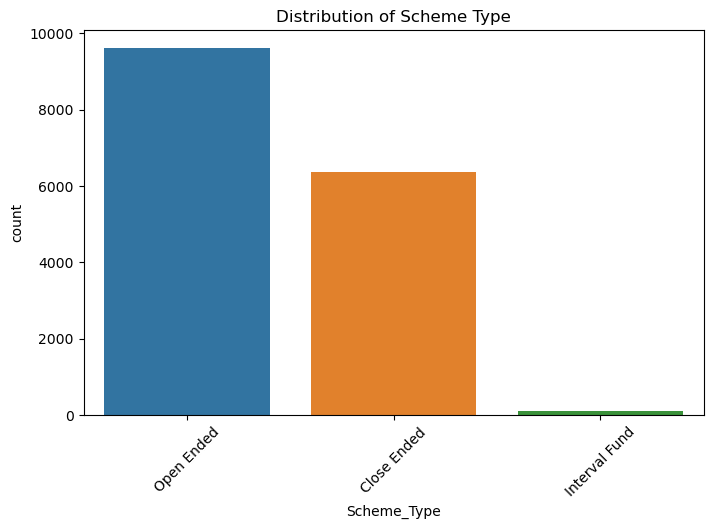

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.countplot(x='Scheme_Type', data=df)
plt.title('Distribution of Scheme Type')
plt.xticks(rotation=45)
plt.show()


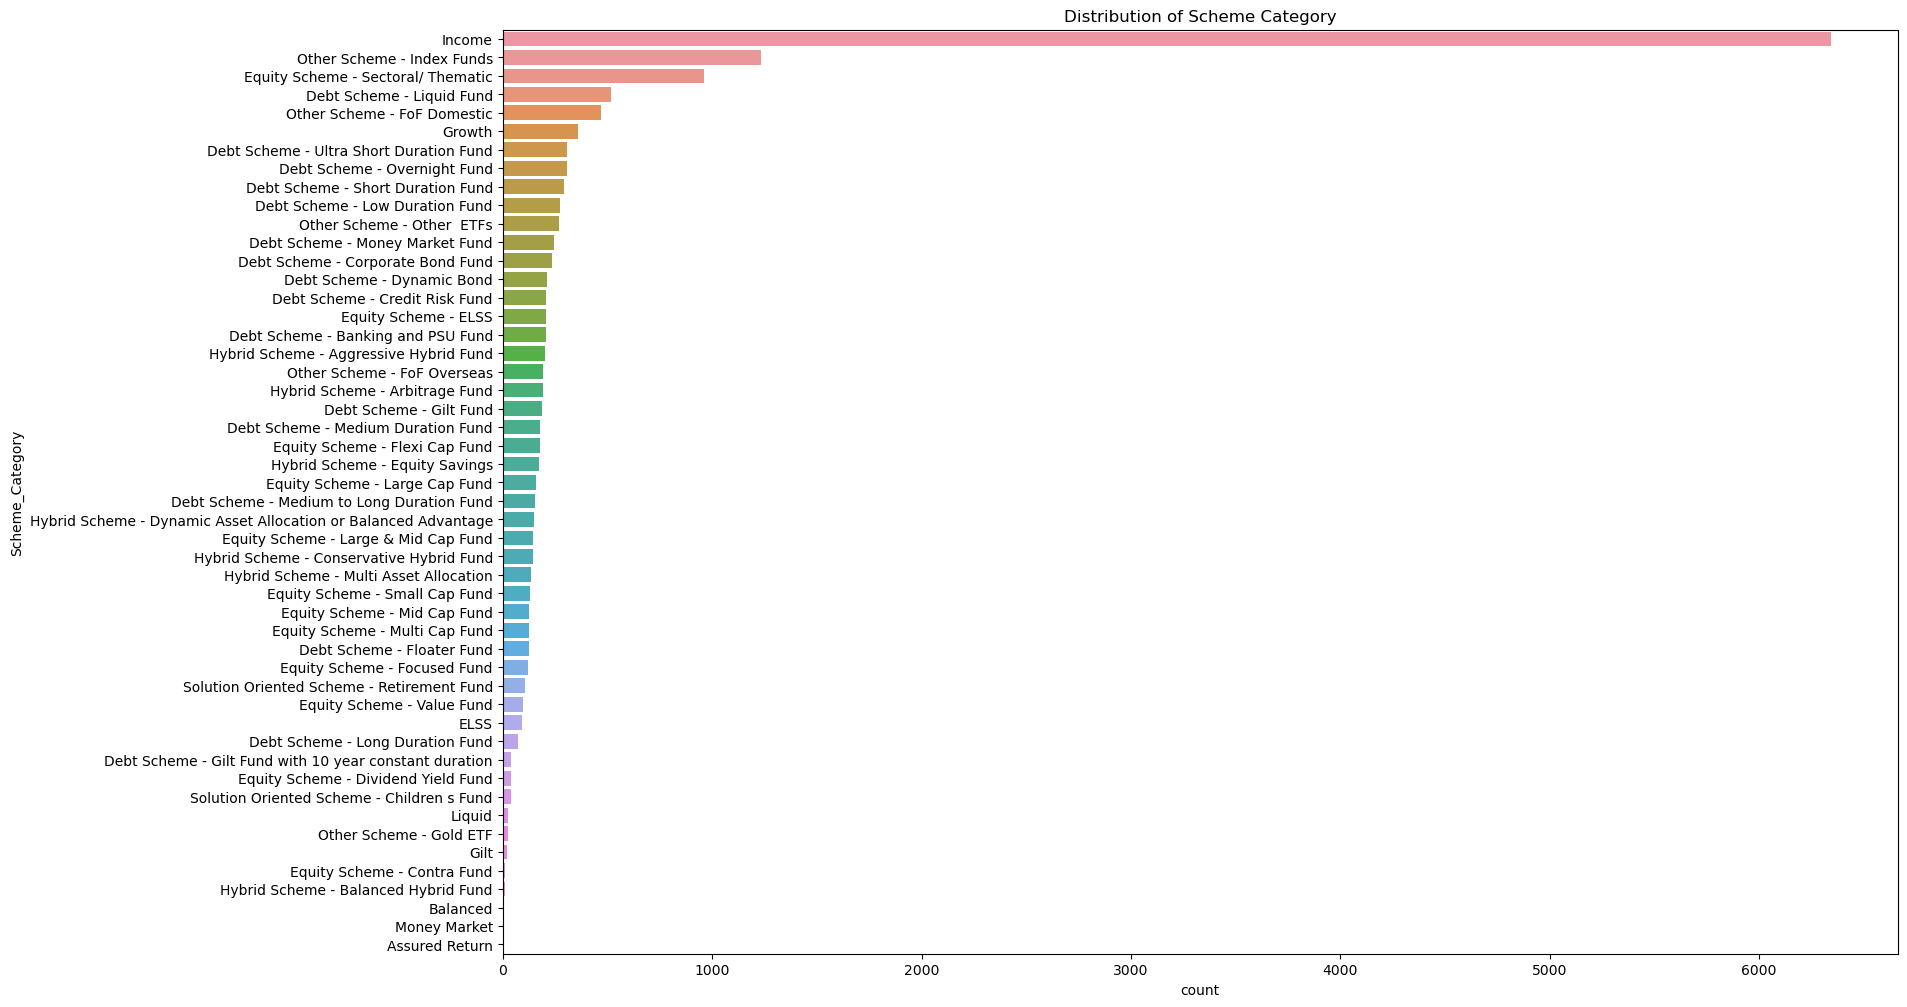

In [27]:
plt.figure(figsize=(18,12))
sns.countplot(y='Scheme_Category', data=df, order=df['Scheme_Category'].value_counts().index)
plt.title('Distribution of Scheme Category')
plt.show()

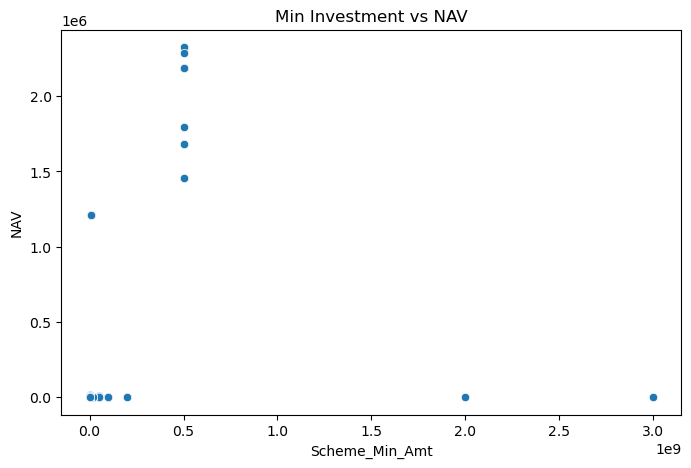

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Scheme_Min_Amt', y='NAV', data=df)
plt.title('Min Investment vs NAV')
plt.show()


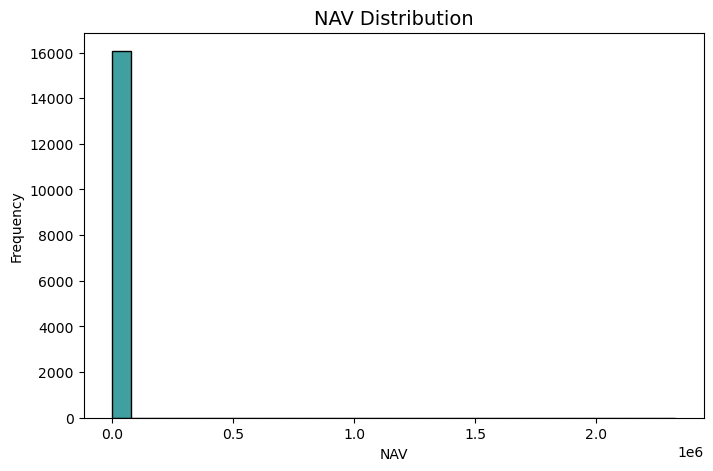

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['NAV'], bins=30, color='teal', edgecolor='black')  # kam bins + color
plt.title('NAV Distribution', fontsize=14)
plt.xlabel('NAV')
plt.ylabel('Frequency')
plt.show()

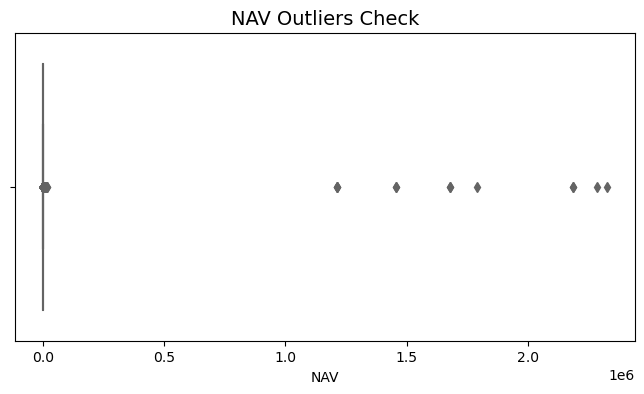

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['NAV'], color='coral')
plt.title('NAV Outliers Check', fontsize=14)
plt.xlabel('NAV')
plt.show()

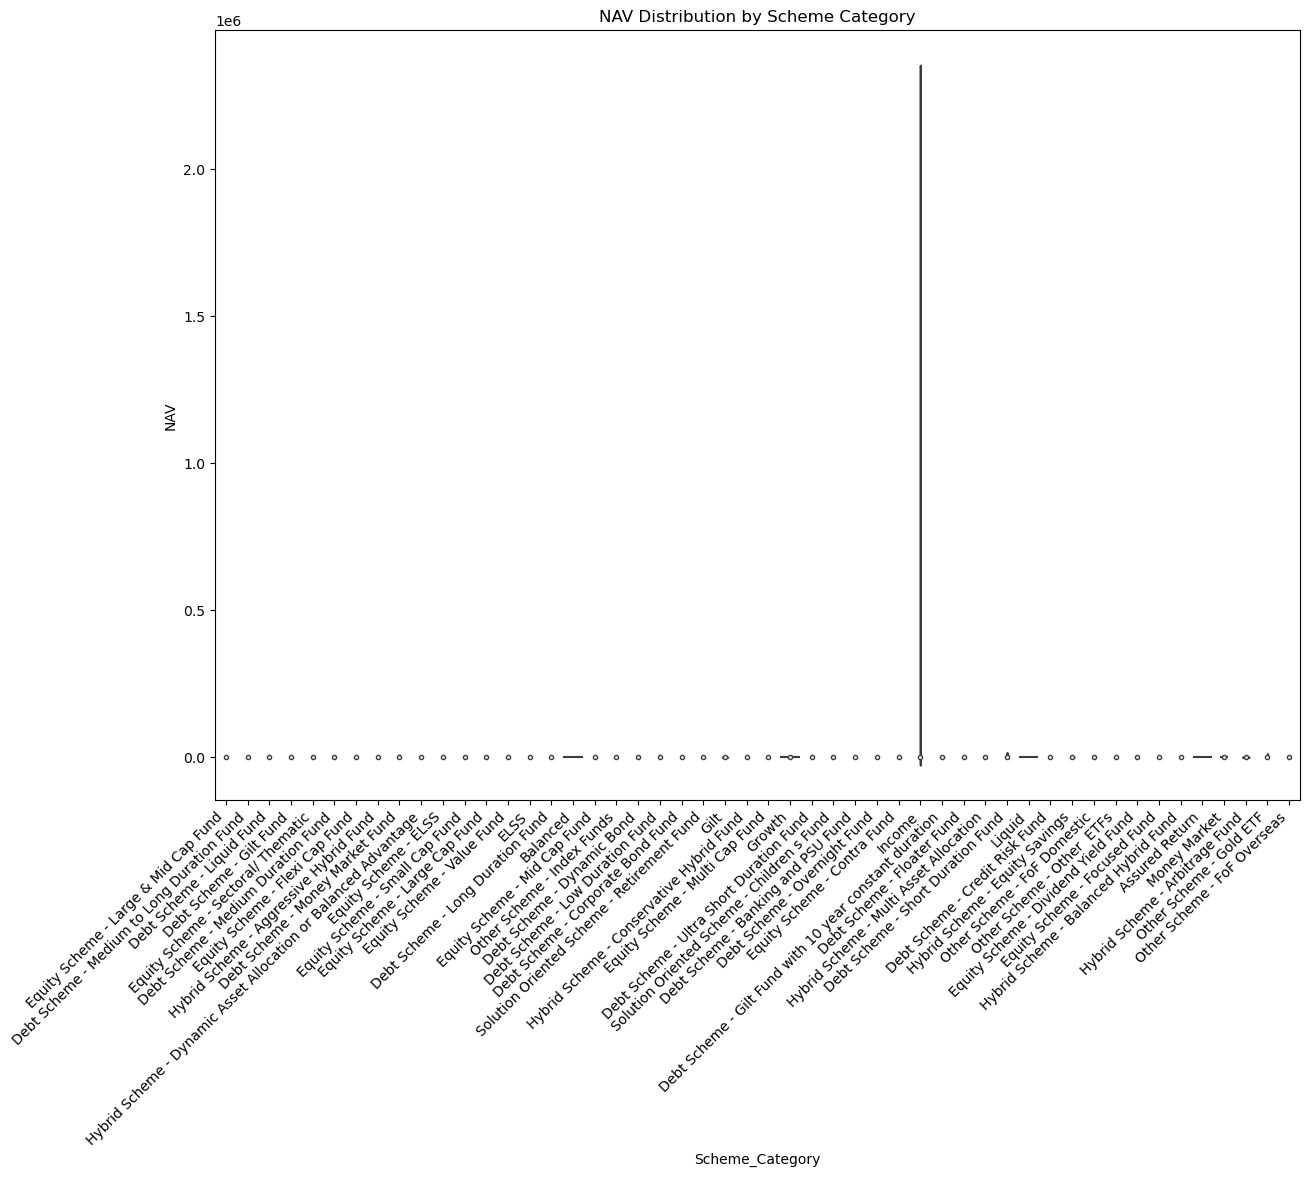

In [31]:
plt.figure(figsize=(14,10))
sns.violinplot(x='Scheme_Category', y='NAV', data=df, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('NAV Distribution by Scheme Category')
plt.show()


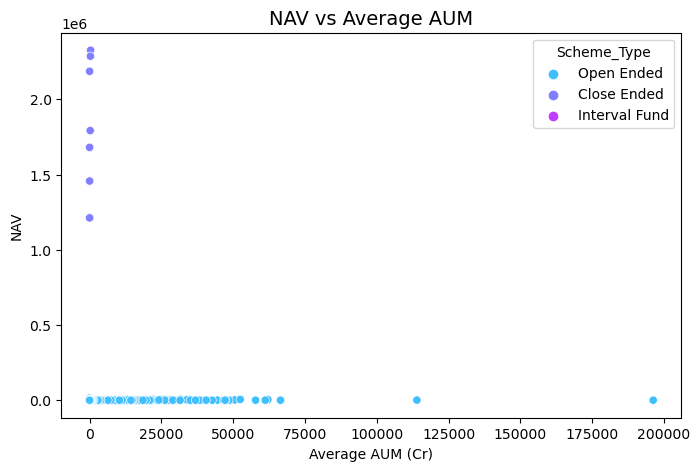

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Average_AUM_Cr', y='NAV', data=df, hue='Scheme_Type', palette='cool')
plt.title('NAV vs Average AUM', fontsize=14)
plt.xlabel('Average AUM (Cr)')
plt.ylabel('NAV')
plt.show()


### **Feature Engineering (Scheme Age, Encoding)**

In [33]:
from datetime import datetime

today = pd.to_datetime('today')
df['Scheme_Age'] = (today - df['Launch_Date']).dt.days / 365

In [34]:
df['Scheme_Age']

0        30.602740
1        30.602740
2        31.750685
3        31.750685
4        31.750685
           ...    
16071    -0.024658
16072    -0.024658
16073    -0.024658
16074    -0.024658
16075     0.005479
Name: Scheme_Age, Length: 16076, dtype: float64

In [35]:
df['Launch_Year'] = df['Launch_Date'].dt.year

In [36]:
df['Launch_Year']

0        1995
1        1995
2        1994
3        1994
4        1994
         ... 
16071    2025
16072    2025
16073    2025
16074    2025
16075    2025
Name: Launch_Year, Length: 16076, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['AMC_encoded'] = le.fit_transform(df['AMC'])

In [38]:
df['AMC_encoded']

0         1
1         1
2         1
3         1
4         1
         ..
16071    21
16072    21
16073    21
16074    21
16075    24
Name: AMC_encoded, Length: 16076, dtype: int32

In [39]:
df['Scheme_Type_encoded'] = le.fit_transform(df['Scheme_Type'])

In [40]:
df['Scheme_Type_encoded']

0        2
1        2
2        2
3        2
4        2
        ..
16071    2
16072    2
16073    2
16074    2
16075    2
Name: Scheme_Type_encoded, Length: 16076, dtype: int32

In [41]:
df['Scheme_Category_encoded'] = le.fit_transform(df['Scheme_Category'])

In [42]:
df['Scheme_Category_encoded']

0        24
1        24
2        13
3        13
4        13
         ..
16071    28
16072    28
16073    28
16074    28
16075    47
Name: Scheme_Category_encoded, Length: 16076, dtype: int32

In [43]:
features = ['AMC_encoded','Scheme_Type_encoded','Scheme_Category_encoded',
            'Scheme_Min_Amt','Average_AUM_Cr','Scheme_Age']
target = 'NAV'

In [44]:
X = df[features]
y = df[target]

In [45]:
X

,AMC_encoded,Scheme_Type_encoded,Scheme_Category_encoded,Scheme_Min_Amt,Average_AUM_Cr,Scheme_Age
0,1,2,24,5000.0,4381.29090,30.602740
1,1,2,24,5000.0,488.14890,30.602740
2,1,2,13,5000.0,12.14340,31.750685
3,1,2,13,5000.0,875.59460,31.750685
4,1,2,13,5000.0,11.20055,31.750685
...,...,...,...,...,...,...
16071,21,2,28,1000.0,11.20055,-0.024658
16072,21,2,28,1000.0,11.20055,-0.024658
16073,21,2,28,1000.0,11.20055,-0.024658
16074,21,2,28,1000.0,11.20055,-0.024658


In [46]:
y

0        917.070000
1        142.230000
2         13.147700
3        125.555100
4         13.107603
            ...    
16071     13.107603
16072     13.107603
16073     13.107603
16074     13.107603
16075     13.107603
Name: NAV, Length: 16076, dtype: float64

### **Model Building (Linear Regression, Random Forest)**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred=model.predict(X_test)

### **Model Evaluation (RMSE, R²)**

In [51]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 53103.83635031801


In [52]:
print("R2 Score:",r2_score(y_test,y_pred))

R2 Score: 0.08394878084445101


### **RandomForestRegressor**

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
y_pred = rf_model.predict(X_test)

In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [58]:
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 6933.521079205302
R2 Score: 0.9843837898731761


In [59]:
r2_train = r2_score(y_train, rf_model.predict(X_train))
print("Train R2:", r2_train)


Train R2: 0.9648751091705441


###  **Feature Importance**

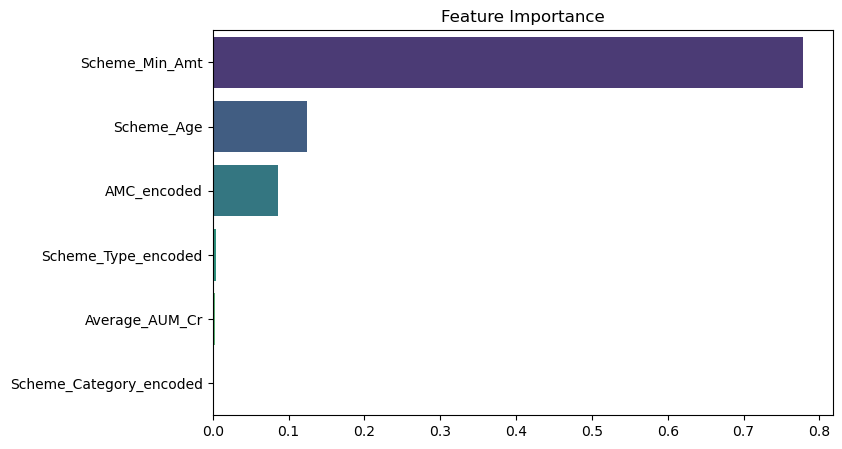

In [60]:
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title('Feature Importance')
plt.show()

### **GridSearchCV**

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [63]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [64]:
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [65]:
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Test RMSE:", rmse)
print("Test R2:", r2)

Test RMSE: 7065.245061285945
Test R2: 0.9837847957338298


In [66]:
train_r2 = r2_score(y_train, best_model.predict(X_train))
print("Train R2:", train_r2)

Train R2: 0.9637617561190763


# 🎯 Conclusion & Insights – Mutual Fund NAV Analysis

## 1️⃣ Dataset Overview

- **Total Columns (16):**  
  `Scheme_Code, Scheme_Name, AMC, Scheme_Type, Scheme_Category, Scheme_NAV_Name, Scheme_Min_Amt, NAV, Latest_NAV_Date, Average_AUM_Cr, AAUM_Quarter, ISIN_Div_Payout/Growth, ISIN_Div_Reinvestment, ISIN_Div_Payout/Growth/Div_Reinvestment, Launch_Date, Closure_Date`  
- **Total Records:** 16,076  

- **Cleaned Features for Modeling:**  
  - `AMC_encoded`  
  - `Scheme_Type_encoded`  
  - `Scheme_Category_encoded`  
  - `Scheme_Min_Amt`  
  - `Average_AUM_Cr`  
  - `Scheme_Age` (derived from `Launch_Date`)  

---

## 2️⃣ Key Insights from Data Analysis

- **Scheme Distribution:**  
  - Most schemes belong to **Equity & Debt** categories.  
  - Certain AMCs dominate the dataset in terms of number of schemes.  

- **NAV Distribution:**  
  - NAV values are **positively skewed**.  
  - Higher NAV schemes are often associated with **larger Average AUM**.  

- **Investment & AAUM Analysis:**  
  - Minimum investment (`Scheme_Min_Amt`) and `AAUM_Quarter` show moderate correlation with NAV.  
  - Scheme age plays a role in NAV growth.  

- **ISIN Insights:**  
  - Dividends payout vs reinvestment types captured in `ISIN` columns can influence NAV trends.  

---

## 3️⃣ Modeling & Predictions

| Model | Test RMSE | Test R² | Notes |
|-------|-----------|---------|-------|
| **Linear Regression** | 53103 | 0.084 | ❌ Poor performance, cannot explain variance |
| **Random Forest (Default)** | 6933 | 0.984 | ✅ Best model, highly accurate predictions |
| **Random Forest (GridSearchCV)** | 7065 | 0.984 | ✅ Slightly generalized, still excellent |

---

## 4️⃣ Best Model Chosen

- **Random Forest (Default Hyperparameters)**  
- **Test RMSE:** 6933 → low prediction error  
- **Test R²:** 0.984 → explains 98% variance  
- **Feature Importance:**  
  - Most important features: **Average_AUM_Cr**, **Scheme_Min_Amt**, **Scheme_Age**  

---

## 5️⃣ Final Observations & Recommendations

- **Random Forest is highly effective** for NAV prediction in mutual fund datasets.  
- **Linear Regression fails** due to non-linear relationships in data.  
- **Visual insights** show:  
  - Certain AMCs dominate schemes.  
  - Older schemes tend to have higher NAV.  
  - NAV correlates with **fund size and investment amount**.  
- **Feature Engineering matters:** Derived features like **Scheme_Age** improve predictions.  

---

## 6️⃣ Design / Visual Touch (Suggestions for Jupyter)

- 🔹 **Blue / Sky Blue:** Dataset overview & numeric values  
- 🔹 **Green:** Best model, RMSE & R²  
- 🔹 **Orange:** Warnings / bad models (Linear Regression, 5-Fold CV issue)  
- 🔹 **Purple / Violet:** Key insights & important features  
- ✅ Use **bold** for important numbers: RMSE, R², top features  

---

## 💡 Takeaway

> Random Forest is **robust, accurate, and interpretable** for predicting NAV. Using derived features like **Scheme Age** and basic encoding ensures **high prediction accuracy**, with RMSE ~6933 and R² ~0.984.  
>  
> Visual and statistical analysis provides **clear business insights**, helping AMC managers and investors understand **key drivers of NAV**.  
